The goal of this notebook is to study how to **fetch IoT timeseries data from the server-side TimescaleDB** and how to **visualize them with Python plotting libraries** effectively. Proper **data sampling rate** needs to be investigated as well in this notebook. For this notebook, online materials listed below are used:
* Installation, DB Connection, and PostgreSQL querying: https://medium.com/analytics-vidhya/postgresql-integration-with-jupyter-notebook-deb97579a38d
* Using PostgreSQL meta-commands: https://medium.com/data-analysis-for-beginners/bring-native-psql-magic-into-jupyter-notebook-50b663d856b5
* Using masic function % for storing data to variables: https://towardsdatascience.com/heres-how-to-run-sql-in-jupyter-notebooks-f26eb90f3259

## Loading libraries and connecting to DB

In [43]:
import sqlalchemy
from sqlalchemy import create_engine
from IPython.display import display_html

In [32]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [33]:
%sql postgresql://postgres@localhost/homedata

'Connected: postgres@homedata'

In [34]:
engine = create_engine('postgresql://postgres@localhost/homedata')

## Query Example: Printing top 3 rows

In [35]:
%%sql

select * from sensor_data limit 3

 * postgresql://postgres@localhost/homedata
3 rows affected.


db_insert_time,room,data_gen_time,sound1,sound2,temperature,humidity,light,motion
2020-04-26 14:44:33.240067-04:00,hroom-1,2020-04-26 14:44:33-04:00,"[38.84491, 41.548523, 43.78904, 37.553318, 34.932198, 34.789368, 35.375282, 37.072533, 36.9852, 38.804432]","[34.714874, 44.053913, 40.614216, 37.209526, 34.59998, 34.460262, 34.454475, 36.158672, 35.970127, 37.8359]",28.289,29.041,95.67,2.5499
2020-04-26 14:44:34.464842-04:00,hroom-1,2020-04-26 14:44:34-04:00,"[37.034363, 42.94117, 43.11823, 36.212498, 34.61035, 34.721, 34.98621, 36.95212, 37.28573, 38.667828]","[33.202198, 42.82431, 40.96828, 36.672382, 34.514984, 36.18337, 34.71283, 36.63037, 36.36674, 38.095177]",28.236,29.047,95.79,2.57324
2020-04-26 14:44:35.536709-04:00,hroom-2,2020-04-26 09:44:35-04:00,"[36.57462, 40.622955, 47.64065, 37.1816, 36.083546, 35.031864, 35.373005, 37.80639, 37.482098, 38.176067]","[37.725174, 41.904285, 44.440018, 37.784557, 35.9873, 35.374237, 35.76456, 38.074524, 38.428814, 39.666794]",20.059,36.423,72.63,2.78305


## PSQL Meta-commands: Printing out the total count of inserted data rows 

In [170]:
%%sql
select count(*) from sensor_data

 * postgresql://postgres@localhost/homedata
1 rows affected.


count
59721


In [171]:
host='localhost'
database='homedata'
username='postgres'

### psql_cmd examples
# \dt : prints data tables
# \d sensor_data : prints sensor_data table schema
# \l+ homedata : prints database size
###
psql_cmd = input("Enter psql command to execute: ")
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Enter psql command to execute:  \dt


Schema,Name,Type,Owner
public,sensor_data,table,postgres
public,sensordata,table,postgres


In [172]:
psql_cmd = "\d sensor_data"
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Column,Type,Collation,Nullable,Default
db_insert_time,timestamp with time zone,,not null,
room,text,,not null,
data_gen_time,timestamp with time zone,,not null,
sound1,real[],,,
sound2,real[],,,
temperature,real,,,
humidity,real,,,
light,real,,,
motion,real,,,


In [173]:
psql_cmd = "\l+ homedata"
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Name,Owner,Encoding,Collate,Ctype,Access privileges,Size,Tablespace,Description
homedata,postgres,UTF8,C,C,,21 MB,pg_default,


## Querying and visualizing data: Magic function % and pandas DataFrame

In [209]:
hroom1_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '12 hours' AND room = 'hroom-1'
hroom2_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '12 hours' AND room = 'hroom-2'
df1 = hroom1_result.DataFrame()
df2 = hroom2_result.DataFrame()

r1s1 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound1) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-1'
r1s2 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound2) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-1'
r2s1 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound1) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-2'
r2s2 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound2) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-2'

r1s1_df = r1s1.DataFrame()
r1s2_df = r1s2.DataFrame()
r2s1_df = r2s1.DataFrame()
r2s2_df = r2s2.DataFrame()

 * postgresql://postgres@localhost/homedata
21405 rows affected.
 * postgresql://postgres@localhost/homedata
21200 rows affected.
 * postgresql://postgres@localhost/homedata
8348 rows affected.
 * postgresql://postgres@localhost/homedata
8348 rows affected.
 * postgresql://postgres@localhost/homedata
8225 rows affected.
 * postgresql://postgres@localhost/homedata
8225 rows affected.


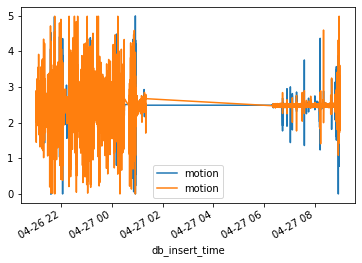

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='motion', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='motion', ax=ax)

plt.show()

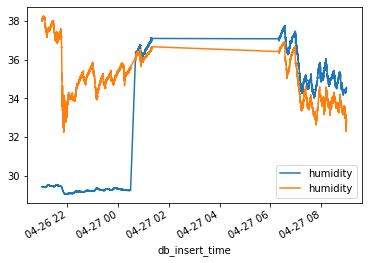

In [211]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='humidity', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='humidity', ax=ax)

plt.show()

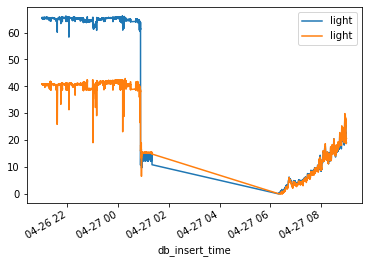

In [212]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='light', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='light', ax=ax)

plt.show()

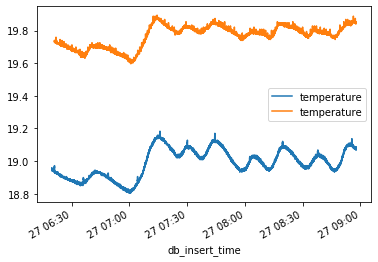

In [202]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='temperature', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='temperature', ax=ax)

plt.show()

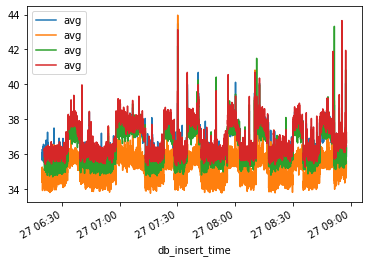

In [203]:
ax = plt.gca()

r1s1_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r1s2_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r2s1_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r2s2_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)

plt.show()